# Linear Regression Single Neuron Model

In this notebook, we implement the single neuron model together with the gradient descent algorithm in order to solve the linear regression problem. We will focus on multivariate linear regression in the CVDs dataset. The dependent variable we choose is 'MaxHR', and the independent variables are 'RestingBP' and 'Cholesterol'. So we want to check the relationship between independent variable and dependent variables.

In [28]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv("https://raw.githubusercontent.com/YulinLi98/Sample_Repo/main/heart.csv")

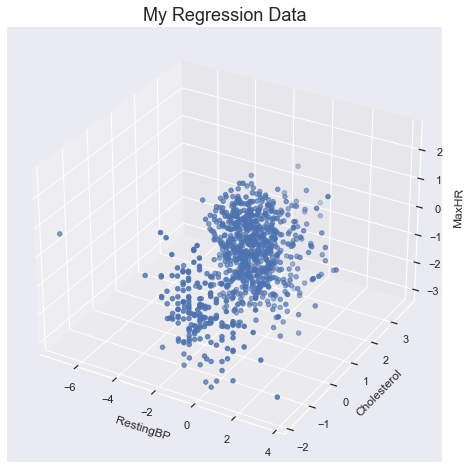

In [25]:
from sklearn import preprocessing

X = df[['RestingBP', 'Cholesterol']].values
y = df.MaxHR.values

# Standardize the data
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

# Visualize a 3D plot
fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(X_scaled[:,0], X_scaled[:,1], y_scaled, cmap='Blues')
ax.set_xlabel('RestingBP')
ax.set_ylabel('Cholesterol')
ax.set_zlabel('MaxHR')
ax.set_title("My Regression Data", fontsize = 18)

plt.show()

Because we are assuming the target function $f:\mathcal{X} \rightarrow \mathcal{Y}$ is a **linear function of the input features**, and because we know single neuron models are good function approximators, we next build a single neuron model with a *linear-activation* function. Furthermore, in this model we choose the *mean-sqaured error* cost function:

$$
C(\mathbf{w}, b) = \frac{1}{2N}\sum_{i=1}^{N}\Big(\hat{y}^{(i)} - y^{(i)}\Big)^2. 
$$

For single neuron models in practice, stochastic gradient descent should be the preferred way for optimizing the weights and bias by minimizing the cost function. We implement stochastic gradient descent with the ```train``` method used in the following custom ```SingleNeuron``` class. 

In [7]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

In [96]:
# Define linear activation function
def linear_activation(z):
    return z

# Create and Train an instance of the SingleNeuron Class
node = SingleNeuron(linear_activation)
node.train(X_scaled, y_scaled, alpha = 0.001, epochs = 100)

Text(0.5, 0.92, 'My Regression Data')

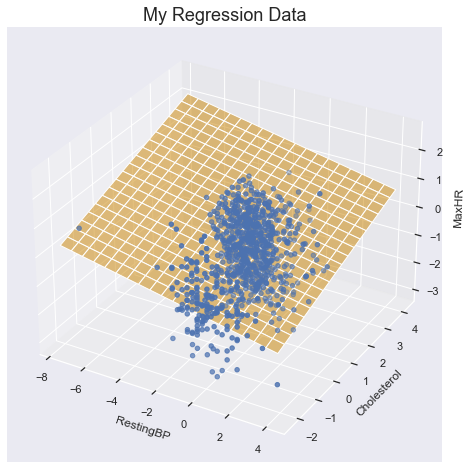

In [97]:
X0_domain = np.linspace(np.min(X_scaled[:,0]) - .5, np.max(X_scaled[:,0]) + .5, 20)
X1_domain = np.linspace(np.min(X_scaled[:,1]) - .5, np.max(X_scaled[:,1]) + .5, 20)
domain = np.meshgrid(X0_domain, X1_domain)
y_pred = node.w_[-1] + node.w_[0] * domain[0] + node.w_[1] * domain[1]

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(X_scaled[:,0], X_scaled[:,1], y_scaled, cmap='Blues')
ax.plot_surface(domain[0], domain[1], y_pred, color = 'orange', alpha = .5)
ax.set_xlabel('RestingBP')
ax.set_ylabel('Cholesterol')
ax.set_zlabel('MaxHR')
ax.set_title("My Regression Data", fontsize = 18)


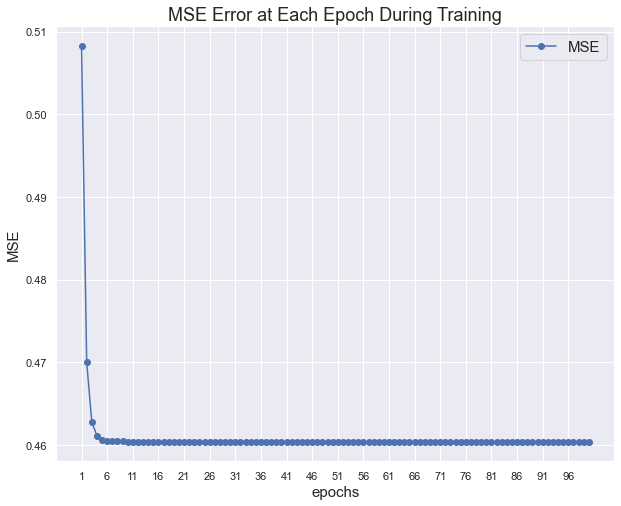

In [98]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1,5))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

Text(0.5, 0.92, 'My Regression Data')

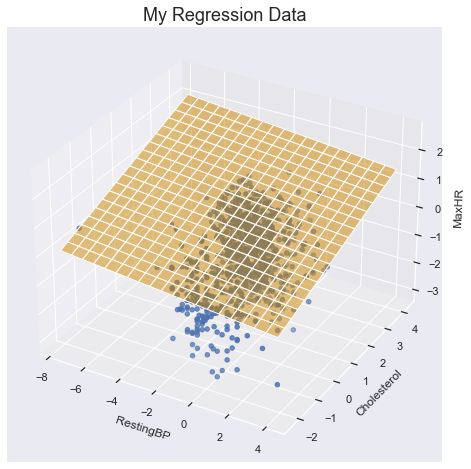

In [99]:
# Now we train the single neuron with 10 times the old learning rate
node.train(X_scaled, y_scaled, alpha = 0.01, epochs = 100)
y_pred = node.w_[-1] + node.w_[0] * domain[0] + node.w_[1] * domain[1]

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(X_scaled[:,0], X_scaled[:,1], y_scaled, cmap='Blues')
ax.plot_surface(domain[0], domain[1], y_pred, color = 'orange', alpha = .5)
ax.set_xlabel('RestingBP')
ax.set_ylabel('Cholesterol')
ax.set_zlabel('MaxHR')
ax.set_title("My Regression Data", fontsize = 18)


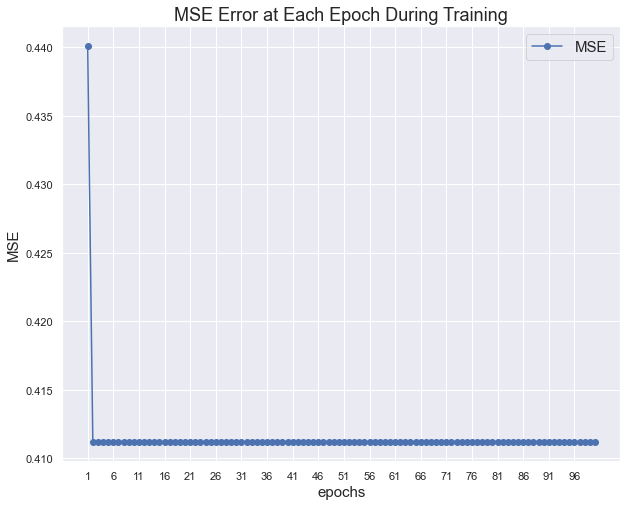

In [100]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1,5))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

Note that, with larger learning rate, the MSE decreased faster. We can also see that the prediction surfaces are very different between two models. 